#Descriptive Statistics

Katia Geraldine Vidals Estrever

In [17]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Inteligencia-artificial-avanzada-para-la-ciencia-de-datos-I/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)
print("Shape (rows, columns):", df.shape)
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Shape (rows, columns): (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

Eliminamos los TotalCharges nulos

In [19]:
df = df.dropna(subset=['TotalCharges'])

In [20]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

desc = df[num_cols].describe().T
desc['skewness'] = df[num_cols].skew()
desc[['count','mean','std','min','25%','50%','75%','max','skewness']]


,count,mean,std,min,25%,50%,75%,max,skewness
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00,0.237731
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75,-0.222103
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80,0.961642


In [21]:
tenure_mean = df['tenure'].mean()
tenure_median = df['tenure'].median()
tenure_skew = df['tenure'].skew()

def interpret_skew(sk):
    if sk > 0.5:
        return "positive skew"
    elif sk < -0.5:
        return "negative skew"
    else:
        return "approximately symmetric"

print(f"Tenure: Mean: {tenure_mean:.2f}, median: {tenure_median:.2f} months, skewness: {tenure_skew:.2f} ({interpret_skew(tenure_skew)}).")


Tenure: Mean: 32.42, median: 29.00 months, skewness: 0.24 (approximately symmetric).


As the mean is greater than the median, the distribution is slightly right-skewed; higher values pull the mean upward. The median indicates that customers typically stay for 29 months.

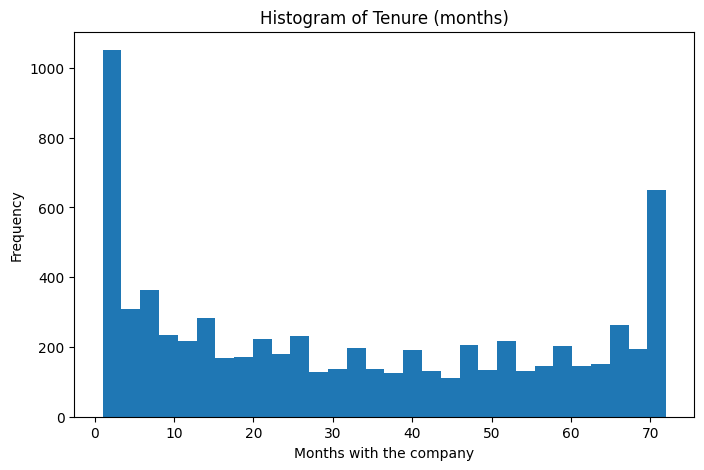

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(df['tenure'], bins=30)
plt.title('Histogram of Tenure (months)')
plt.xlabel('Months with the company')
plt.ylabel('Frequency')
plt.show()


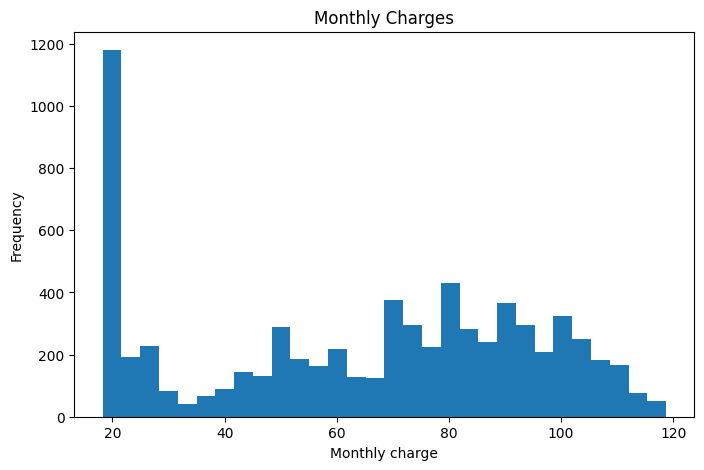

In [23]:
plt.figure(figsize=(8, 5))
plt.hist(df['MonthlyCharges'], bins=30)
plt.title('Monthly Charges')
plt.xlabel('Monthly charge')
plt.ylabel('Frequency')
plt.show()


In [24]:
medians = df.groupby('Churn')[['tenure', 'MonthlyCharges']].median()
print("Medians:")
print(medians)


Medians:
       tenure  MonthlyCharges
Churn                        
No       38.0           64.45
Yes      10.0           79.65


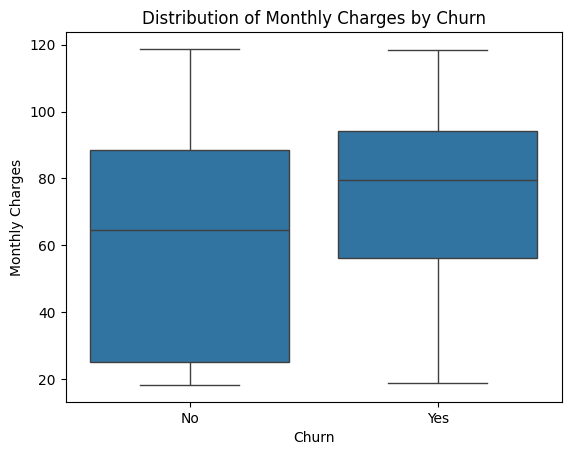

In [25]:
import seaborn as sns
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Distribution of Monthly Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()


Now that we’ve examined tenure and MonthlyCharges by churn status, we see that customers who churn typically have shorter tenure and higher monthly charges, whereas more loyal customers tend to have lower monthly charges.
